<a href="https://colab.research.google.com/github/Weichunchou/PBPK-model-R/blob/main/Module_1_Simple_PK_model_R_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install NumbaLSODA

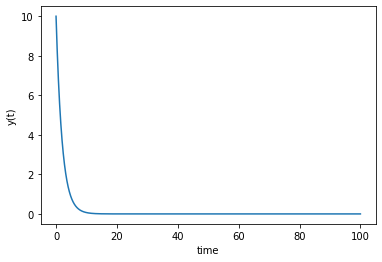

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function return dy/dt

def model(y,t):
    k = 0.5
    dydt = -k*y
    return dydt

# inital condition
y0 = 10

# time points
t = np.linspace(0,100, num=10000)

# solve ode
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

In [ ]:
# activate R magic
%load_ext rpy2.ipython

In [ ]:
from rpy2.robjects.packages import importr
utils = importr('utils')

package_name = "deSolve"
utils.install_packages(package_name)

R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpOYnwTL/downloaded_packages’
R[write to console]: 
R[write to console]: 



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f75cb0f0730> [RTYPES.NILSXP]

In [ ]:
%%R
library("deSolve") # load an add-on package for solving differential equations

# Input the differential equation
# pkmodel is a customized function used to compute the value(s) of derivative(s) at a specific time

pkmodel <- function(time, C0, parms) {# C0 is the initial value of the concentration, parms is the parameter k

# The with( ) function applies an expression to a dataset
    with(as.list(c(C0,parms)),{
    dC <- - k*C # d/dt(C) = - k * C
    list(dC)
  })
}

C0 <- c(C=10) # initial concentration; 
              # C0 lists the initial state variable, which is usually a constant concentration or volume
parms <- c(k = 0.5) # the rate constant
                    # parms list the model parameter, which is usually a rate variable

times <- seq(0, 100, 0.01) # simulation start time and end time
out <- ode(C0, times, pkmodel, parms) # solve the differential equation with parameters

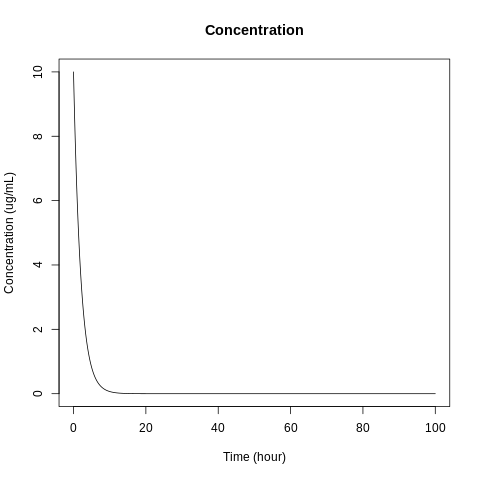

In [ ]:
%%R
plot(out,main = "Concentration", xlab = "Time (hour)", ylab = "Concentration (ug/mL)")
